# Wstep teoretyczny


Na wykładzie wciąż kontynowaliśmy temat wizualizacji danych. Na pierwszy ogień poszła biblioteka seaborn.
Dobra alternatywa dla matplotlib gdzie funkcje są bardzo intuicyjne.   
Dzięki bibliotece seaborn możemy rysować zlozone wykresy skrzynkowe ```sns.boxplot()``` i histogramy ```sns.displot()```.   
Implementacja biblioteki wyglada następująco:
 ``` python
import seaborn as sns
```
Głównym tematem wykładu był wstęp do statystyki. Aby korzystać z metod statystycznych trzeba zaimportować bibliotekę scipy.stats:
```python
import scipy.stats as stats
```
Porozmawialismy o rozkładach prawdopodobieństwa które dzielimy na ciągłe i dyskretne m.in rozkład normalny.   
Aby wygenerować rozkład normalny korzysta się z metody norm, i za jego pomocą można wygenerować odpowiednio funkcję gęstości prawdopodobieństwa oraz dystrybuantę:
```python
x=np.linspace(x1,x2,n)
d1=stats.norm.pdf(x,loc=mean,scale=std) 
dys=stats.norm.cdf(x,loc=mean,scale=std)
```
Mówiliśmy również o generowniu liczb pseudo-losowych co przydaje się do badania niektórych przypadków.   
Aby wygenerować takie liczby używa się funkcji ```np.random.uniform(2, 8, 1000)```.

Na koniec poznaliśmy metody/techniki estymacji punktowej pozwalającej  na oszacowanie wartości pewnego
nieznanego parametru θ.  

Robimy to poprzez metodę ```fit``` która zwraca odpowiednią krotkę estymatorów(metodą największej wiarygodności) np:
```python 
mean,std = stats.norm.fit(dane)
```
Można równieć wyznaczyć przedział ufności dla estymatora metodą ```interval```, która jest metodą rozkładów prawdopodobieństwa:
```python
interval=stats.t.interval(alpha=0.95,df=N-1,loc=mean,scale=std)
```

# Zadanie 1


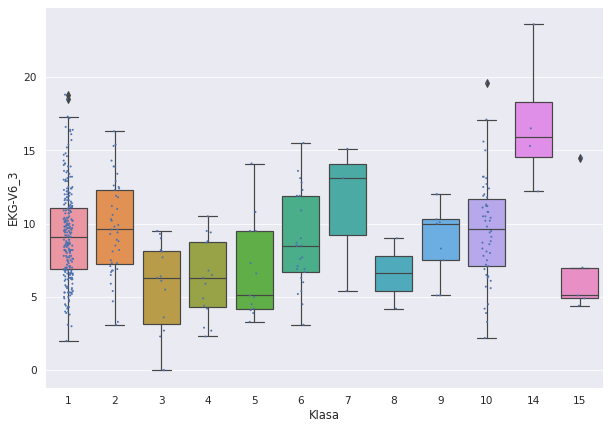

In [147]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)

data = pd.read_excel("Wynik_EKG.xlsx")


change_class=pd.DataFrame({'Klasa':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                           'klasa':["zdrowy","arytmia","arytmia","arytmia","arytmia","arytmia"
                                   ,"arytmia","arytmia","arytmia","arytmia","arytmia","arytmia"
                                   "arytmia","arytmia","arytmia","arytmia"]})
data=pd.merge(data,change_class)

change_sex=pd.DataFrame({'Sex':[0,1],
                        'sex':['M','F']})
data=pd.merge(data,change_sex)
data.Sex=data.sex
del data['sex']

fig = plt.figure(figsize = (10,7))
sns.boxplot(x='Klasa',y='EKG-V6_3',data=data)
sns.stripplot(x="Klasa", y="EKG-V6_3", data=data, size=2, color="b")
plt.show()

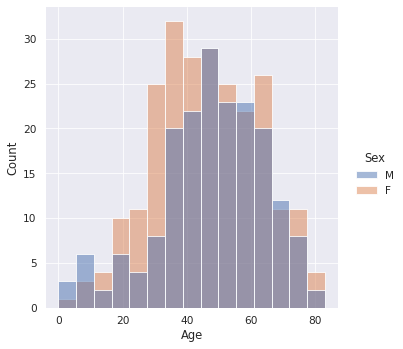

In [138]:
sns.displot(data,x="Age",hue="Sex")
plt.show()

Powrót do badania ekg ale teraz z użyciem biblioteki seaborn

# Zadanie 2

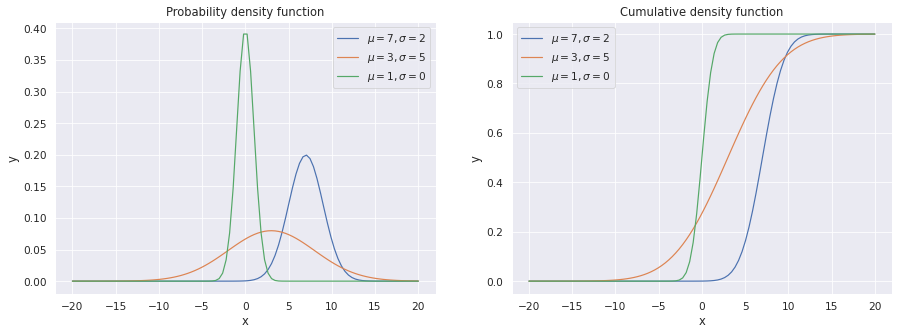

In [139]:
p = [(2,7),(5,3),(1,0)]
x = np.linspace(-20,20,100)
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = [15,5])

ax1.plot(x,stats.norm.pdf(x,loc=7,scale=2),label=r'$\mu=7,\sigma=2$')
ax1.plot(x,stats.norm.pdf(x,loc=3,scale=5),label=r'$\mu=3,\sigma=5$')
ax1.plot(x,stats.norm.pdf(x,loc=0,scale=1),label=r'$\mu=1,\sigma=0$')

ax2.plot(x,stats.norm.cdf(x,loc=7,scale=2),label=r'$\mu=7,\sigma=2$')
ax2.plot(x,stats.norm.cdf(x,loc=3,scale=5),label=r'$\mu=3,\sigma=5$')
ax2.plot(x,stats.norm.cdf(x,loc=0,scale=1),label=r'$\mu=1,\sigma=0$')

ax1.set_title("Probability density function")   
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

ax2.set_title("Cumulative density function")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()

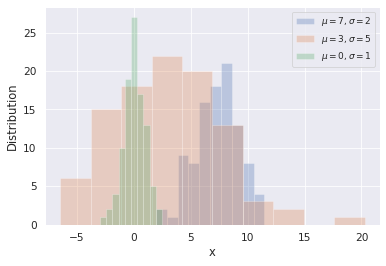

In [140]:
d1=np.random.normal(loc=7,scale=2,size=100)
d2=np.random.normal(loc=3,scale=5,size=100)
d3=np.random.normal(loc=0,scale=1,size=100)
plt.hist(d1,alpha = 0.3,label=f'$\mu=7,\sigma=2$')
plt.hist(d2,alpha = 0.3,label=r'$\mu=3,\sigma=5$')
plt.hist(d3,alpha = 0.3,label=r'$\mu=0,\sigma=1$')
plt.xlabel("x")
plt.ylabel("Distribution")
plt.legend(prop={'size': 9})
plt.show()

([<matplotlib.axis.XTick at 0x7fa8d02670a0>,
 [Text(0, 0, '$\\mu=7,\\sigma=2$'),
  Text(1, 0, '$\\mu=3,\\sigma=5$'),
  Text(2, 0, '$\\mu=0,\\sigma=1$')])

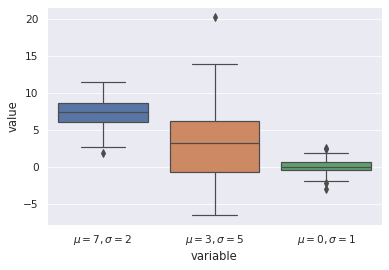

In [141]:
tab=np.array([d1,d2,d3]).T
df=pd.DataFrame(tab)

sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.xticks([0,1,2],[r'$\mu=7,\sigma=2$',r'$\mu=3,\sigma=5$',r'$\mu=0,\sigma=1$'])

Zabawa z rozkladem normalnym gdzie widzimy jak dla róznych parametrów wygląda rozklad ciągły i dyskretny

# Zadanie 3

Text(0, 0.5, 'Liczba zliczeń')

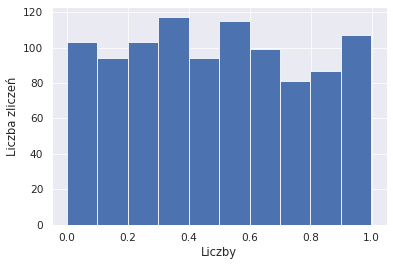

In [142]:
def generator(x_0):   
    a=3131
    c=28233
    m=124555
    N=1000
    x_n = x_0
    y_n = []
    for x in range(N):
        x_n=(a*x_n+c)%m
        y_n.append(x_n/m)
    return y_n

tab=generator(1)
plt.hist(tab)
plt.xlabel("Liczby")
plt.ylabel("Liczba zliczeń")

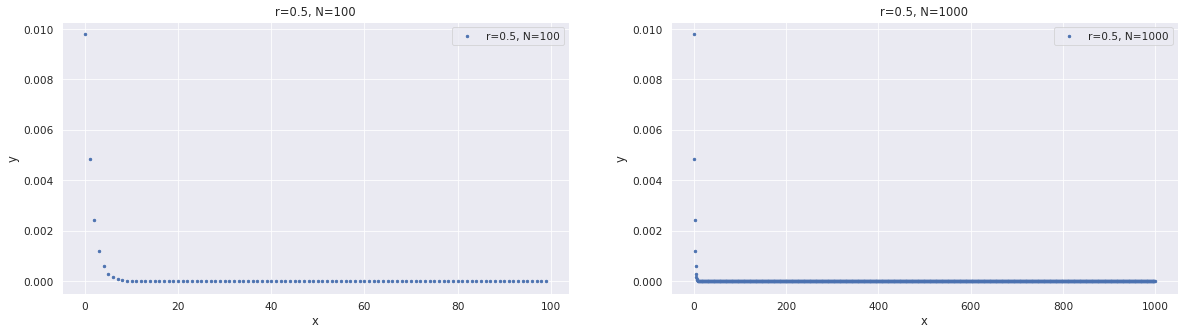

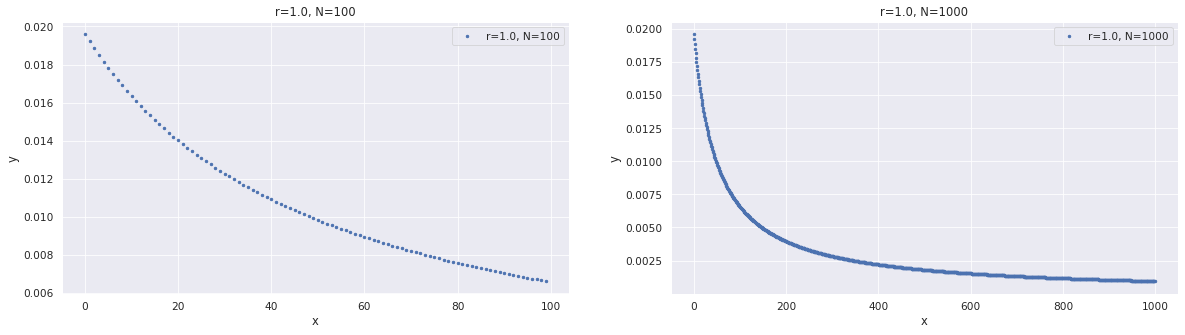

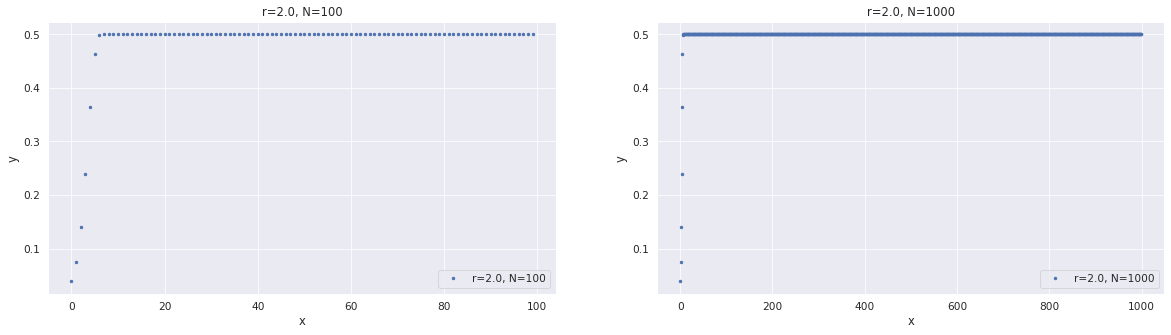

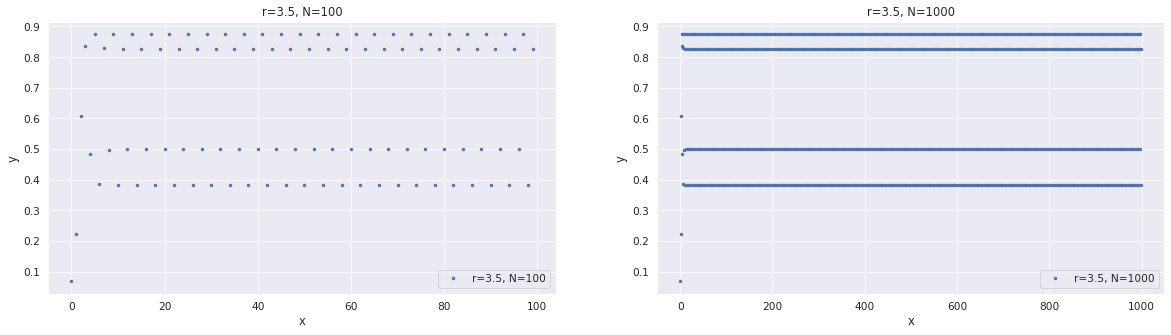

In [143]:
def generator_bio(x_0,r,N):   
    x_n = x_0
    y_n = []
    for x in range(N):
        x_n=r*x_n*(1-x_n)
        y_n.append(x_n)
    return y_n

r=[0.5,1.0,2.0,3.5]
x_0=0.02
N1=100
N2=1000

for i in r:
    fig, (ax0, ax1)=plt.subplots(ncols=2,figsize=[20,5])
    ax0.plot(generator_bio(x_0,i,N1),'.',label="r="+str(i)+", N="+str(N1))
    ax0.set_title("r="+str(i)+", N="+str(N1))
    ax0.set_xlabel("x")
    ax0.set_ylabel("y")
    ax0.legend()
    
    ax1.plot(generator_bio(x_0,i,N2),'.',label="r="+str(i)+", N="+str(N2))
    ax1.set_title("r="+str(i)+", N="+str(N2))
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

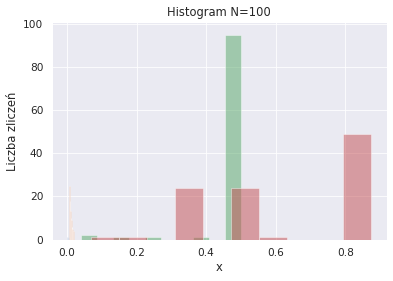

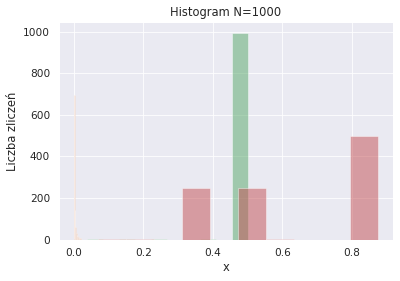

In [144]:
for i in r:
    plt.hist(generator_bio(x_0,i,N1),alpha=0.5)
plt.title("Histogram N="+str(100))
plt.xlabel("x")
plt.ylabel("Liczba zliczeń")
plt.show()
    
for i in r:
    plt.hist(generator_bio(x_0,i,N2),alpha=0.5)
plt.title("Histogram N="+str(1000))
plt.xlabel("x")
plt.ylabel("Liczba zliczeń")
plt.show()


Pokazanie metod generowania liczb pseudolosowych dwoma metodami. Jak widać nie są one w pełni losowe i podlegają pewnemu rozkładowi.

#  Zadanie 4

(-1.0994713695023444,
 1.0999748271191592,
 -1.0998615404412626,
 1.0998615404412626)

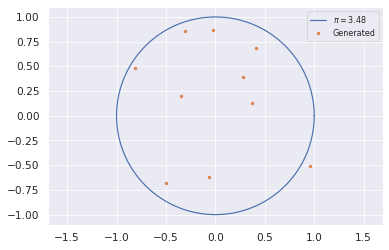

In [145]:
theta = np.linspace(0,2*np.pi,100)
r=1

x=r*np.cos(theta)
y=r*np.sin(theta)

xr=np.random.uniform(-r,r,10)
yr=np.random.uniform(-r,r,10)

X,Y = np.meshgrid(xr,yr)
R = X**2+Y**2

pi = (4*len(R[R<=r]))/(R.shape[0]*R.shape[1]) 

plt.plot(x,y,label=r'$\pi=$'+str(pi))
plt.plot(xr,yr,'.',label="Generated")
plt.legend(loc=1,prop={'size': 8})
plt.axis("equal")

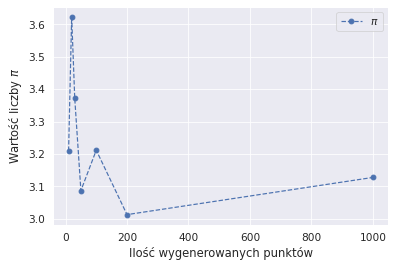

In [146]:
PI=[]
N=[10,20,30,50,100,200,1000]

for i in N:
    xr=np.random.uniform(-r,r,i-1)
    yr=np.random.uniform(-r,r,i-1)
    X,Y = np.meshgrid(xr,yr)
    R = X**2+Y**2
    PI.append((4*len(R[R<=r]))/(R.shape[0]*R.shape[1]))
    
plt.plot(N,PI,'o--',label=r'$\pi$')
plt.legend()
plt.xlabel("Ilość wygenerowanych punktów")
plt.ylabel(r"Wartość liczby $\pi$")
plt.show()

Metoda Monte- Carlo gdzie wyznaczaliśmy przybliżenie liczby pi. Przydatne np. w całkowaniu.

# Zadanie 5  

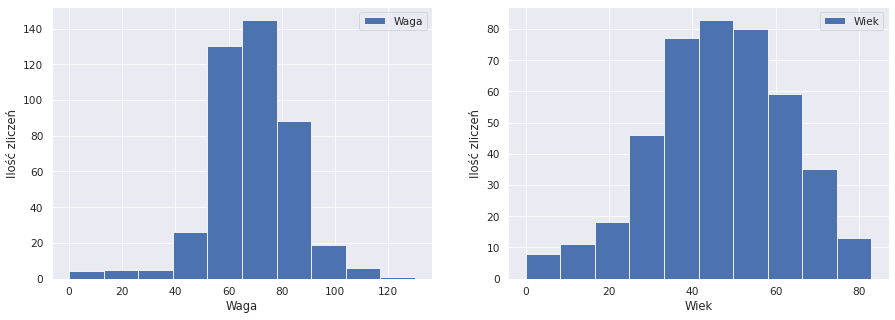

In [151]:
fig,(ax0,ax1)=plt.subplots(ncols=2,figsize=[15,5])

ax0.hist(data["Weight (kg)"],label="Waga",range=(0,130))
ax0.set_xlabel("Waga")
ax0.set_ylabel("Ilość zliczeń")
ax0.legend()

ax1.hist(data["Age"],label="Wiek")
ax1.set_xlabel("Wiek")
ax1.set_ylabel("Ilość zliczeń")
ax1.legend()
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

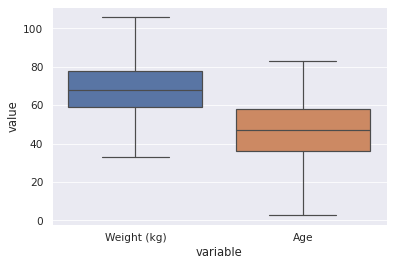

In [152]:
df=pd.DataFrame([data["Weight (kg)"],data["Age"]])
df=df.T
sns.boxplot(x="variable", y="value", data=pd.melt(df),showfliers=False)


In [153]:
loc1,scale1 = stats.norm.fit(data["Weight (kg)"])
loc2,scale2 = stats.norm.fit(data["Age"])
print("Średnia waga: {:.2f} lat, Odchylenie: {:.2f} lat".format(loc1,scale1))
print("Średni wiek: {:.2f} lat, Odchylenie: {:.2f} lat".format(loc2,scale2))

Średnia waga: 68.17 lat, Odchylenie: 16.52 lat
Średni wiek: 46.58 lat, Odchylenie: 16.29 lat


In [154]:
interval1 = stats.t.interval(alpha=0.95,df=len(data)-1, loc=loc1, scale=scale1)
print(interval1)
interval2 = stats.t.interval(alpha=0.95,df=len(data)-1, loc=loc2, scale=scale2)
print(interval2)

(35.71048952530567, 100.63369652120596)
(14.570358646956166, 78.59708321350895)


Tu już statystyka w praktyce gdzie badaliśmy przedziały ufności dla średniej i odchylenia.

# Podsumowanie

Po tych zajęciach myśle że już nabyłem dość zadowalające umiejętności z wizualizacji danych. Z biblioteką scipy miałem już doczynienia na innych zajęciach ze statystyki ale teraz stała się dla mnie bardziej jasna. 

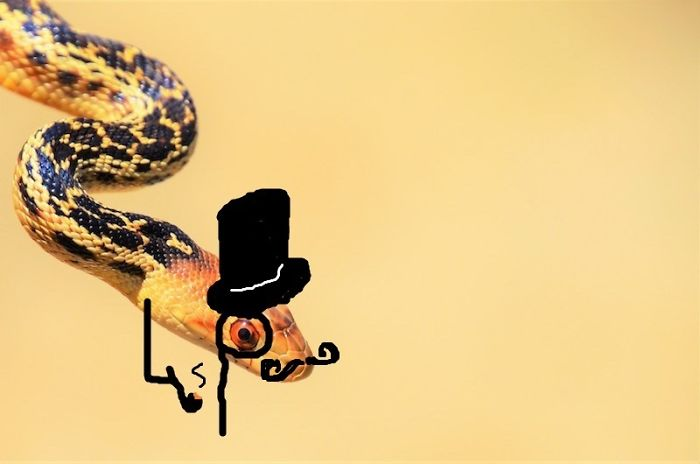